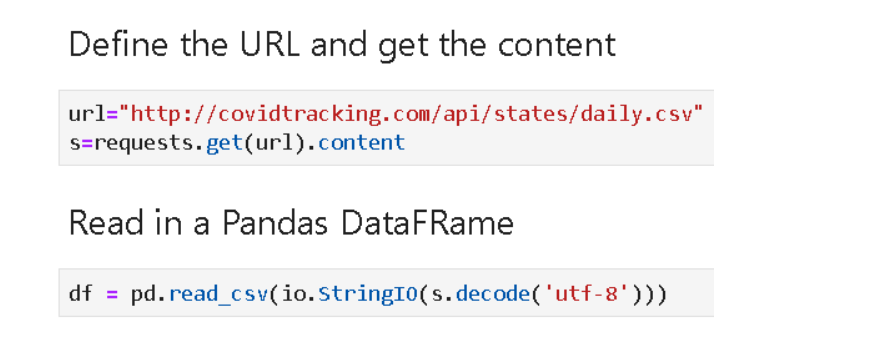

In [76]:
import requests
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import io

In [77]:
url = 'http://covidtracking.com/api/states/daily.csv'
s = requests.get(url).content


In [78]:
df = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [79]:
df['date'] = pd.to_datetime(df['date'],format='%Y%m%d')

In [80]:
cols = ['date', 'state', 'positive', 'probableCases','negative','totalTestResultsSource','hospitalizedCurrently','hospitalizedCumulative','inIcuCurrently','onVentilatorCurrently','onVentilatorCumulative','recovered','dataQualityGrade','deathConfirmed','hospitalized','totalTestsViral','negativeTestsViral','positiveCasesViral','fips','totalTestsPeopleAntigen','positiveTestsPeopleAntigen']

In [81]:
df = df[df['date']<='2020-12-31']

df = df[cols]

In [82]:
df_train = df[df['date']<'2020-12-01'].copy()
df_test = df[df['date']>='2020-12-01'].copy()

In [83]:
df_train.columns

Index(['date', 'state', 'positive', 'probableCases', 'negative', 'totalTestResultsSource', 'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently', 'onVentilatorCurrently', 'onVentilatorCumulative', 'recovered', 'dataQualityGrade', 'deathConfirmed', 'hospitalized', 'totalTestsViral', 'negativeTestsViral', 'positiveCasesViral', 'fips', 'totalTestsPeopleAntigen', 'positiveTestsPeopleAntigen'], dtype='object')

In [84]:
df_train.head()[2:3]

,date,state,positive,probableCases,negative,totalTestResultsSource,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,deathConfirmed,hospitalized,totalTestsViral,negativeTestsViral,positiveCasesViral,fips,totalTestsPeopleAntigen,positiveTestsPeopleAntigen
3530,2020-11-30,AR,157359.0,19303.0,1545401.0,totalTestsViral,1063.0,8937.0,407.0,211.0,989.0,138696.0,A+,2295.0,8937.0,1683457.0,1545401.0,138056.0,5,136774.0,23474.0


In [85]:
df_train['dataQualityGrade'].unique()

array(['A', 'A+', 'D', 'B', 'C', nan, '#REF!', 'F'], dtype=object)

In [86]:
df_train = df_train[cols]

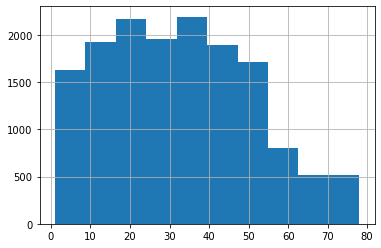

In [87]:
df_train['fips'].hist()

In [88]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = df_train.corr()
corr.style.background_gradient(cmap='coolwarm')

,positive,probableCases,negative,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,onVentilatorCurrently,onVentilatorCumulative,recovered,deathConfirmed,hospitalized,totalTestsViral,negativeTestsViral,positiveCasesViral,fips,totalTestsPeopleAntigen,positiveTestsPeopleAntigen
positive,1.000000,0.810616,0.874550,0.573216,0.821783,0.512696,0.276326,0.896374,0.854223,0.708433,0.821783,0.924834,0.950228,0.999133,-0.152709,0.641797,0.962268
probableCases,0.810616,1.000000,0.622978,0.674729,0.667475,0.658295,0.152791,0.946585,0.807704,0.252383,0.667475,0.716635,0.871333,0.786637,-0.118532,-0.001613,0.999473
negative,0.874550,0.622978,1.000000,0.472732,0.883836,0.284107,0.098253,0.889467,0.755675,0.687703,0.883836,0.951665,0.971020,0.856385,-0.195479,0.881630,0.712148
hospitalizedCurrently,0.573216,0.674729,0.472732,1.000000,0.440429,0.984295,0.906378,0.748574,0.466896,0.374683,0.440429,0.606691,0.644475,0.668440,-0.107709,0.212546,0.974785
hospitalizedCumulative,0.821783,0.667475,0.883836,0.440429,1.000000,0.353947,0.362165,0.931267,0.347411,0.810128,1.000000,0.881038,0.965730,0.923318,-0.062001,0.901035,0.951580
inIcuCurrently,0.512696,0.658295,0.284107,0.984295,0.353947,1.000000,0.964541,0.865182,0.452379,0.286763,0.353947,0.532598,0.477254,0.659310,-0.127414,0.108642,0.834753
onVentilatorCurrently,0.276326,0.152791,0.098253,0.906378,0.362165,0.964541,1.000000,0.840339,0.176301,0.176611,0.362165,0.267521,0.250062,0.241863,-0.062563,-0.127197,0.842317
onVentilatorCumulative,0.896374,0.946585,0.889467,0.748574,0.931267,0.865182,0.840339,1.000000,0.808607,0.979785,0.931267,0.835739,0.774134,0.908798,-0.395399,0.776486,0.808596
recovered,0.854223,0.807704,0.755675,0.466896,0.347411,0.452379,0.176301,0.808607,1.000000,0.373561,0.347411,0.801502,0.822290,0.925351,0.062760,0.882131,0.875591
deathConfirmed,0.708433,0.252383,0.687703,0.374683,0.810128,0.286763,0.176611,0.979785,0.373561,1.000000,0.810128,0.693262,0.770087,0.695114,-0.175044,0.749549,0.942282


In [129]:
set_state = {}
for group,frame in df_train.groupby('state'):
    set_state[group] = frame

In [130]:
set_state['AK'].describe()

,positive,probableCases,negative,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,onVentilatorCurrently,onVentilatorCumulative,recovered,deathConfirmed,hospitalized,totalTestsViral,negativeTestsViral,positiveCasesViral,fips,totalTestsPeopleAntigen,positiveTestsPeopleAntigen
count,259.000000,0.0,0.0,227.000000,267.000000,0.0,186.000000,0.0,224.000000,212.000000,267.000000,2.700000e+02,117.000000,0.0,270.0,0.0,0.0
mean,5615.366795,NaN,NaN,45.440529,190.460674,NaN,6.349462,NaN,2153.107143,39.886792,190.460674,2.681900e+05,519075.854701,NaN,2.0,NaN,NaN
std,7438.684765,NaN,NaN,37.011954,183.574352,NaN,5.501982,NaN,2429.841183,30.919195,183.574352,2.754022e+05,203387.787479,NaN,0.0,NaN,NaN
min,3.000000,NaN,NaN,7.000000,1.000000,NaN,0.000000,NaN,29.000000,9.000000,1.000000,8.000000e+00,253987.000000,NaN,2.0,NaN,NaN
25%,404.000000,NaN,NaN,18.000000,42.500000,NaN,2.000000,NaN,370.250000,12.000000,42.500000,3.013300e+04,375546.000000,NaN,2.0,NaN,NaN
50%,2260.000000,NaN,NaN,39.000000,111.000000,NaN,6.000000,NaN,826.500000,28.000000,111.000000,1.706865e+05,464517.000000,NaN,2.0,NaN,NaN
75%,7494.000000,NaN,NaN,47.000000,301.000000,NaN,8.000000,NaN,2496.250000,60.000000,301.000000,4.331980e+05,588975.000000,NaN,2.0,NaN,NaN
max,31323.000000,NaN,NaN,162.000000,725.000000,NaN,27.000000,NaN,7165.000000,121.000000,725.000000,1.011396e+06,971946.000000,NaN,2.0,NaN,NaN


In [131]:
df_aux = set_state['AK']

In [132]:
df_aux = df_aux.loc[df_aux['deathConfirmed'].dropna().index]

In [133]:
df_aux = df_aux.T.dropna().T.set_index('date')

In [138]:
df_aux = df_aux.loc[:,df_aux.nunique() >1 ]

In [152]:
df_aux['Day'] = df_aux.index.day
df_aux['Month'] = df_aux.index.month
df_aux['dayofweek'] = df_aux.index.dayofweek



In [148]:
df_aux.index.dayofweek


Int64Index([0, 6, 5, 4, 3, 2, 1, 0, 6, 5,
            ...
            1, 0, 6, 5, 4, 3, 2, 1, 0, 6], dtype='int64', name='date', length=212)

In [162]:
df_aux.head(2)

,positive,hospitalizedCurrently,hospitalizedCumulative,dataQualityGrade,deathConfirmed,hospitalized,totalTestsViral,Day,Month,dayofweek
date,,,,,,,,,,
2020-11-30,31323,162,725,A,121,725,1.0114e+06,30,11,0
2020-11-29,30816,159,722,A,121,722,1.00618e+06,29,11,6


In [164]:
df_aux = pd.get_dummies(df_aux, columns=['dataQualityGrade'])

In [171]:
y = df_aux[df_aux['Month']==11].T.values
X = df_aux[df_aux['Month']!=11].T.values

In [183]:
y.shape

(13, 30)

In [184]:
X.shape

(13, 182)

In [186]:
df_aux[df_aux['Month']!=11]['Month']

date
2020-10-31    10
2020-10-30    10
2020-10-29    10
2020-10-28    10
2020-10-27    10
2020-10-26    10
2020-10-25    10
2020-10-24    10
2020-10-23    10
2020-10-22    10
2020-10-21    10
2020-10-20    10
2020-10-19    10
2020-10-18    10
2020-10-17    10
2020-10-16    10
2020-10-15    10
2020-10-14    10
2020-10-13    10
2020-10-12    10
2020-10-11    10
2020-10-10    10
2020-10-09    10
2020-10-08    10
2020-10-07    10
2020-10-06    10
2020-10-05    10
2020-10-04    10
2020-10-03    10
2020-10-02    10
2020-10-01    10
2020-09-30     9
2020-09-29     9
2020-09-28     9
2020-09-27     9
2020-09-26     9
2020-09-25     9
2020-09-24     9
2020-09-23     9
2020-09-22     9
2020-09-21     9
2020-09-20     9
2020-09-19     9
2020-09-18     9
2020-09-17     9
2020-09-16     9
2020-09-15     9
2020-09-14     9
2020-09-13     9
2020-09-12     9
2020-09-11     9
2020-09-10     9
2020-09-09     9
2020-09-08     9
2020-09-07     9
2020-09-06     9
2020-09-05     9
2020-09-04     9
2020-09-0

In [176]:
from sklearn.neural_network import MLPRegressor
activations = ['tanh', 'relu']
alphas= [0.0001,0.001, 0.1, 1.0, 10, 100]

scores = []

for thisactivation  in activations:
    for thisalpha in alphas:

        mlpreg = MLPRegressor(hidden_layer_sizes = [5,5,5],
                                     activation = thisactivation,
                                     alpha = thisalpha,
                                     solver = 'lbfgs').fit(X, y)

        scores.append([thisactivation,thisalpha, mlpreg.score(X, y)])


C:\Users\bruno\anaconda3\envs\aulas\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\bruno\anaconda3\envs\aulas\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\bruno\anaconda3\envs\aulas\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMIN

In [179]:
df_result = pd.DataFrame(scores)

In [182]:
df_result.round(3)

,0,1,2
0,tanh,0.000,-0.000
1,tanh,0.001,-0.000
2,tanh,0.100,0.015
3,tanh,1.000,-0.001
4,tanh,10.000,-0.034
5,tanh,100.000,0.000
6,relu,0.000,0.507
7,relu,0.001,1.000
8,relu,0.100,0.999
9,relu,1.000,1.000


In [172]:
from sklearn.neural_network import MLPRegressor

thisactivation = 'relu'
thisalpha = 0.1
mlpreg = MLPRegressor(hidden_layer_sizes = [5,5,5],
                             activation = thisactivation,
                             alpha = thisalpha,
                             solver = 'lbfgs').fit(X, y)

In [173]:
mlpreg.score(X, y)

0.9999931220866792